<a href="https://www.kaggle.com/code/yeasin307/data-mining-assignment?scriptVersionId=185929433" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt
%matplotlib inline

# Retail Transactional Dataset

In [2]:
retail=pd.read_csv('/kaggle/input/retail-transactional-dataset/retail_data.csv');
retail.head()

,Transaction_ID,Customer_ID,Name,Email,Phone,Address,City,State,Zipcode,Country,...,Total_Amount,Product_Category,Product_Brand,Product_Type,Feedback,Shipping_Method,Payment_Method,Order_Status,Ratings,products
0,8691788.0,37249.0,Michelle Harrington,Ebony39@gmail.com,1.414787e+09,3959 Amanda Burgs,Dortmund,Berlin,77985.0,Germany,...,324.086270,Clothing,Nike,Shorts,Excellent,Same-Day,Debit Card,Shipped,5.0,Cycling shorts
1,2174773.0,69749.0,Kelsey Hill,Mark36@gmail.com,6.852900e+09,82072 Dawn Centers,Nottingham,England,99071.0,UK,...,806.707815,Electronics,Samsung,Tablet,Excellent,Standard,Credit Card,Processing,4.0,Lenovo Tab
2,6679610.0,30192.0,Scott Jensen,Shane85@gmail.com,8.362160e+09,4133 Young Canyon,Geelong,New South Wales,75929.0,Australia,...,1063.432799,Books,Penguin Books,Children's,Average,Same-Day,Credit Card,Processing,2.0,Sports equipment
3,7232460.0,62101.0,Joseph Miller,Mary34@gmail.com,2.776752e+09,8148 Thomas Creek Suite 100,Edmonton,Ontario,88420.0,Canada,...,2466.854021,Home Decor,Home Depot,Tools,Excellent,Standard,PayPal,Processing,4.0,Utility knife
4,4983775.0,27901.0,Debra Coleman,Charles30@gmail.com,9.098268e+09,5813 Lori Ports Suite 269,Bristol,England,48704.0,UK,...,248.553049,Grocery,Nestle,Chocolate,Bad,Standard,Cash,Shipped,1.0,Chocolate cookies


In [3]:
retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302010 entries, 0 to 302009
Data columns (total 30 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Transaction_ID    301677 non-null  float64
 1   Customer_ID       301702 non-null  float64
 2   Name              301628 non-null  object 
 3   Email             301663 non-null  object 
 4   Phone             301648 non-null  float64
 5   Address           301695 non-null  object 
 6   City              301762 non-null  object 
 7   State             301729 non-null  object 
 8   Zipcode           301670 non-null  float64
 9   Country           301739 non-null  object 
 10  Age               301837 non-null  float64
 11  Gender            301693 non-null  object 
 12  Income            301720 non-null  object 
 13  Customer_Segment  301795 non-null  object 
 14  Date              301651 non-null  object 
 15  Year              301660 non-null  float64
 16  Month             30

In [4]:
df = retail.iloc[:500,20:30]
print(df.isnull().sum())

Total_Amount        0
Product_Category    2
Product_Brand       0
Product_Type        0
Feedback            2
Shipping_Method     1
Payment_Method      0
Order_Status        0
Ratings             2
products            0
dtype: int64


In [5]:
df=df.apply(LabelEncoder().fit_transform)
df.head()

,Total_Amount,Product_Category,Product_Brand,Product_Type,Feedback,Shipping_Method,Payment_Method,Order_Status,Ratings,products
0,102,1,8,20,2,1,2,3,4,62
1,210,2,12,25,2,2,1,2,3,119
2,260,0,9,2,0,1,1,2,1,199
3,408,4,5,28,2,2,3,2,3,220
4,72,3,7,3,1,2,0,3,0,41


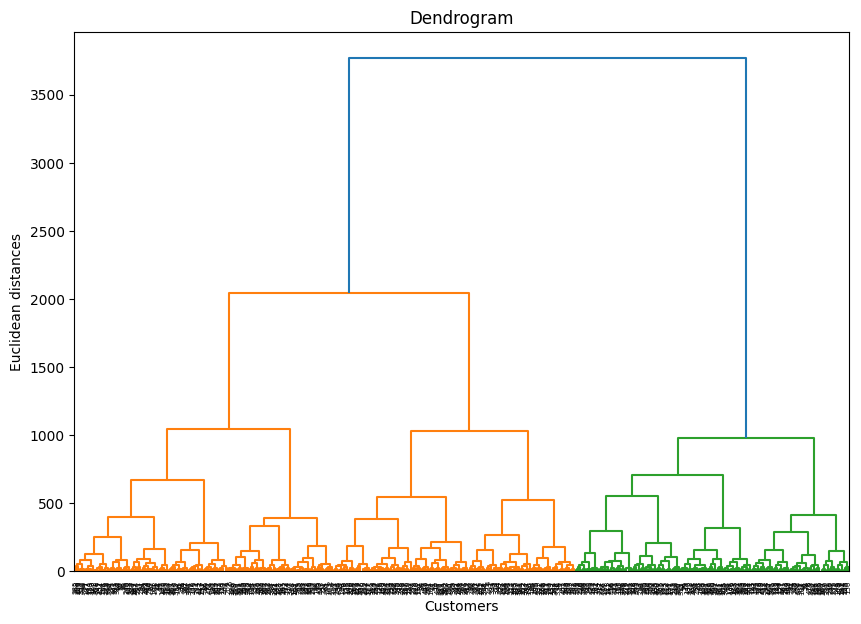

In [6]:
linked = linkage(df, method='ward')

# Plot the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

Text(0, 0.5, 'Score')

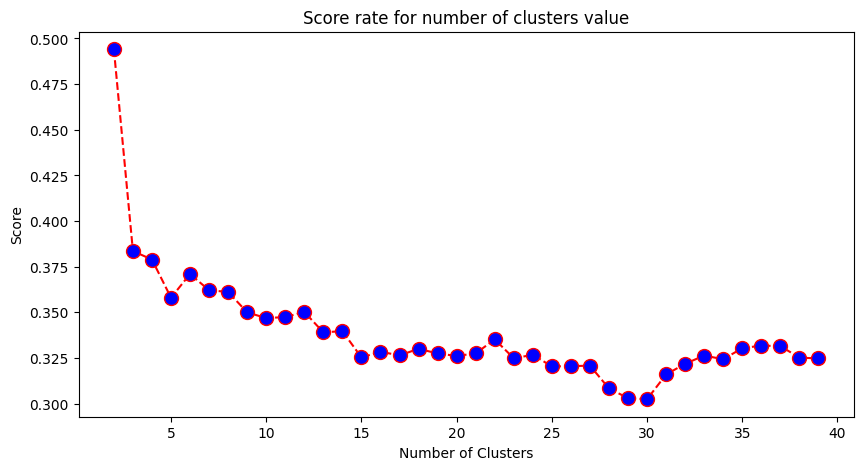

In [7]:
score = []

# Calculating score for number of clusters between 2 and 40
for i in range(2, 40):
    kmeans = KMeans(n_clusters=i, n_init="auto", max_iter=300, random_state=0)
    kmeans_labels = kmeans.fit_predict(df)
    kmeans_score = silhouette_score(df, kmeans_labels)
    score.append(kmeans_score)
plt.figure(figsize=(10, 5))
plt.plot(range(2, 40), score, color='red', linestyle='dashed', marker='o', markerfacecolor='blue', markersize=10)
plt.title('Score rate for number of clusters value')
plt.xlabel('Number of Clusters')
plt.ylabel('Score')

In [8]:
# KMeans Clustering
kmeans = KMeans(n_clusters=6, n_init="auto", max_iter=300, random_state=0)
kmeans_labels = kmeans.fit_predict(df)
kmeans_score = silhouette_score(df, kmeans_labels)

Text(0, 0.5, 'Score')

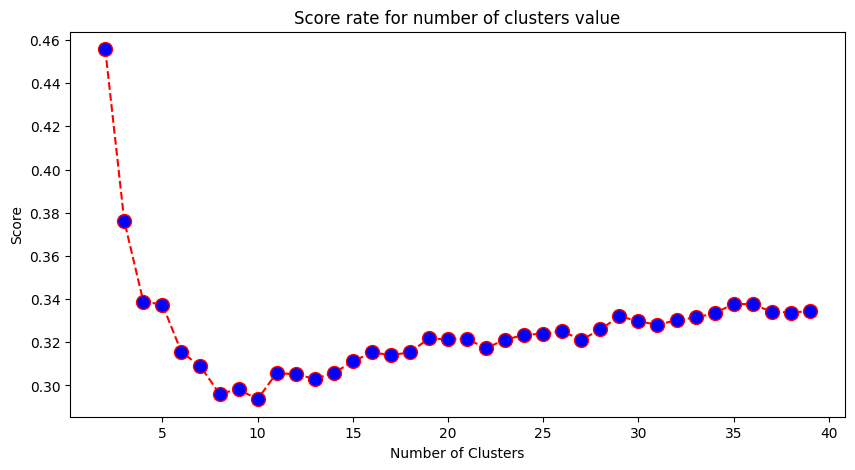

In [9]:
score = []

# Calculating score for number of clusters between 2 and 40
for i in range(2, 40):
    agg_clustering = AgglomerativeClustering(n_clusters=i, linkage='ward')
    agg_labels = agg_clustering.fit_predict(df)
    agg_score = silhouette_score(df, agg_labels)
    score.append(agg_score)
plt.figure(figsize=(10, 5))
plt.plot(range(2, 40), score, color='red', linestyle='dashed', marker='o', markerfacecolor='blue', markersize=10)
plt.title('Score rate for number of clusters value')
plt.xlabel('Number of Clusters')
plt.ylabel('Score')

In [10]:
# Agglomerative Clustering
agg_clustering = AgglomerativeClustering(n_clusters=6, linkage='ward')
agg_labels = agg_clustering.fit_predict(df)
agg_score = silhouette_score(df, agg_labels)

In [11]:
print(f'KMeans Silhouette Score: {kmeans_score}')
print(f'Agglomerative Clustering Silhouette Score: {agg_score}')


KMeans Silhouette Score: 0.3710111412129663
Agglomerative Clustering Silhouette Score: 0.3154866290483134


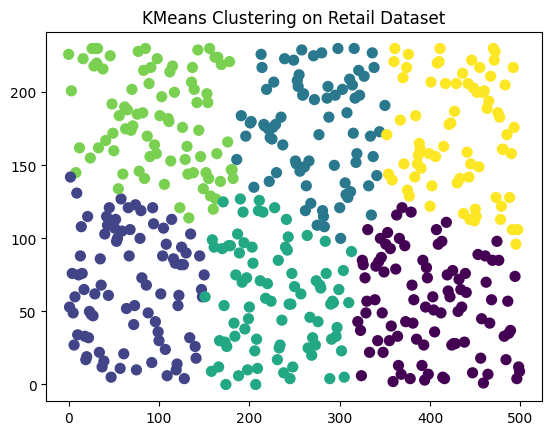

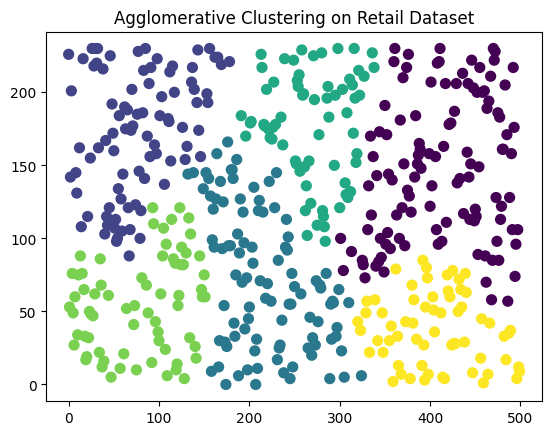

In [12]:
# Visualization Function
def plot_clusters(df, labels, title):
    plt.scatter(df.iloc[:500,0:1].values.flatten(), df.iloc[:500,9:].values.flatten(), c=labels, s=50, cmap='viridis')
    plt.title(title)
    plt.show()

# Plot Clusters
plot_clusters(df, kmeans_labels, 'KMeans Clustering on Retail Dataset')
plot_clusters(df, agg_labels, 'Agglomerative Clustering on Retail Dataset')


# Credit Card Dataset

In [13]:
credit_card=pd.read_csv('/kaggle/input/ccdata/CC GENERAL.csv');
credit_card.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [14]:
credit_card.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [15]:
df = credit_card.iloc[:500,:]
print(df.isnull().sum())

CUST_ID                              0
BALANCE                              0
BALANCE_FREQUENCY                    0
PURCHASES                            0
ONEOFF_PURCHASES                     0
INSTALLMENTS_PURCHASES               0
CASH_ADVANCE                         0
PURCHASES_FREQUENCY                  0
ONEOFF_PURCHASES_FREQUENCY           0
PURCHASES_INSTALLMENTS_FREQUENCY     0
CASH_ADVANCE_FREQUENCY               0
CASH_ADVANCE_TRX                     0
PURCHASES_TRX                        0
CREDIT_LIMIT                         0
PAYMENTS                             0
MINIMUM_PAYMENTS                    37
PRC_FULL_PAYMENT                     0
TENURE                               0
dtype: int64


In [16]:
df=df.apply(LabelEncoder().fit_transform)
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,0,41,16,28,0,33,0,7,0,1,0,0,2,2,23,55,0,6
1,1,356,21,0,0,0,218,0,0,0,10,4,0,42,389,309,10,6
2,2,328,22,176,162,0,0,25,19,0,0,0,12,45,119,247,0,6
3,3,269,12,260,231,0,36,1,1,0,1,1,1,45,0,463,0,6
4,4,179,22,3,4,0,0,1,1,0,0,0,1,3,126,153,0,6


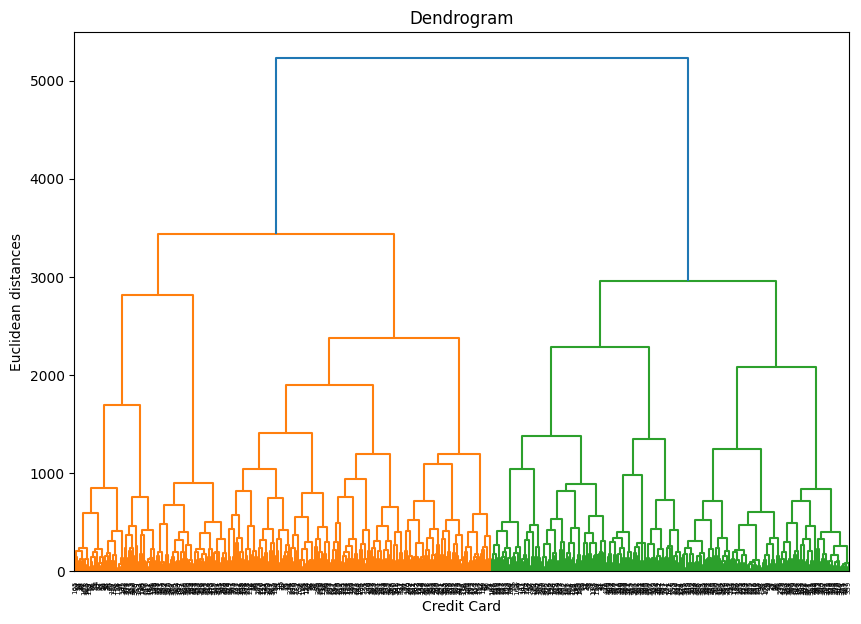

In [17]:
linked = linkage(df, method='ward')

# Plot the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Dendrogram')
plt.xlabel('Credit Card')
plt.ylabel('Euclidean distances')
plt.show()

Text(0, 0.5, 'Score')

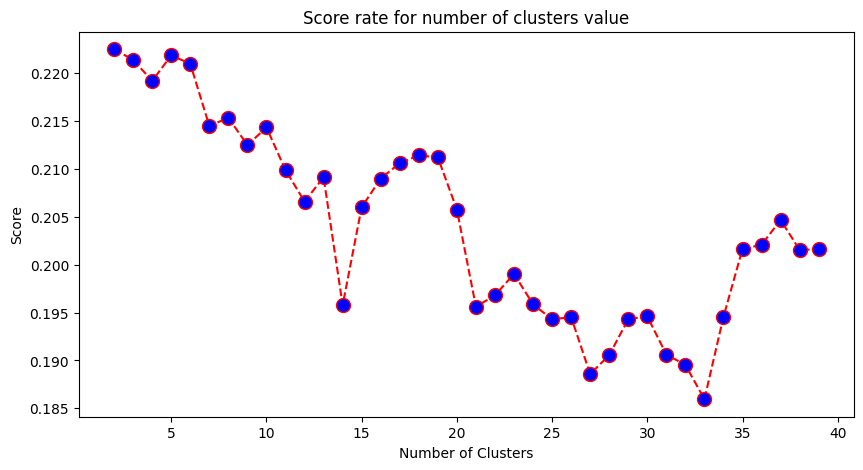

In [18]:
score = []

# Calculating score for number of clusters between 2 and 40
for i in range(2, 40):
    kmeans = KMeans(n_clusters=i, n_init="auto", max_iter=300, random_state=0)
    kmeans_labels = kmeans.fit_predict(df)
    kmeans_score = silhouette_score(df, kmeans_labels)
    score.append(kmeans_score)
plt.figure(figsize=(10, 5))
plt.plot(range(2, 40), score, color='red', linestyle='dashed', marker='o', markerfacecolor='blue', markersize=10)
plt.title('Score rate for number of clusters value')
plt.xlabel('Number of Clusters')
plt.ylabel('Score')

In [19]:
# KMeans Clustering
kmeans = KMeans(n_clusters=5, n_init="auto", max_iter=300, random_state=0)
kmeans_labels = kmeans.fit_predict(df)
kmeans_score = silhouette_score(df, kmeans_labels)

Text(0, 0.5, 'Score')

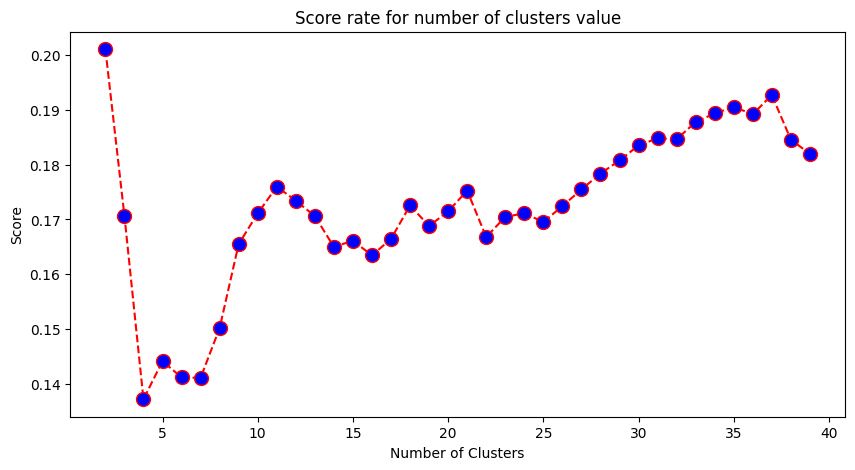

In [20]:
score = []

# Calculating score for number of clusters between 2 and 40
for i in range(2, 40):
    agg_clustering = AgglomerativeClustering(n_clusters=i, linkage='ward')
    agg_labels = agg_clustering.fit_predict(df)
    agg_score = silhouette_score(df, agg_labels)
    score.append(agg_score)
plt.figure(figsize=(10, 5))
plt.plot(range(2, 40), score, color='red', linestyle='dashed', marker='o', markerfacecolor='blue', markersize=10)
plt.title('Score rate for number of clusters value')
plt.xlabel('Number of Clusters')
plt.ylabel('Score')

In [21]:
# Agglomerative Clustering
agg_clustering = AgglomerativeClustering(n_clusters=2, linkage='ward')
agg_labels = agg_clustering.fit_predict(df)
agg_score = silhouette_score(df, agg_labels)

In [22]:
print(f'KMeans Silhouette Score: {kmeans_score}')
print(f'Agglomerative Clustering Silhouette Score: {agg_score}')

KMeans Silhouette Score: 0.22187075688188482
Agglomerative Clustering Silhouette Score: 0.20108214819794393


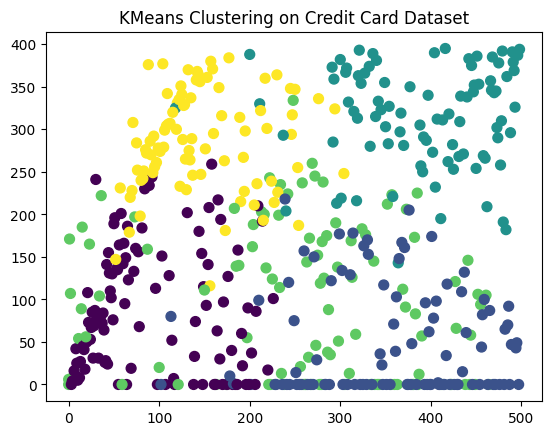

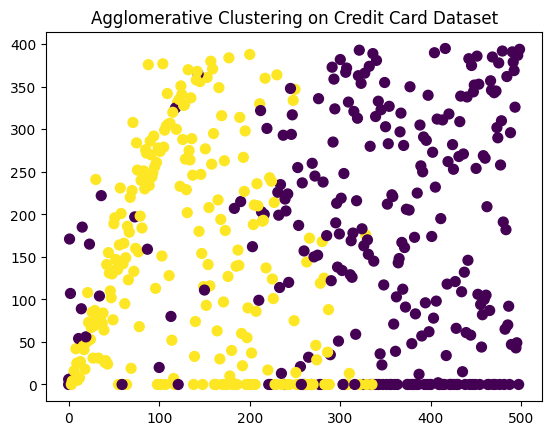

In [23]:
# Visualization Function
def plot_clusters(df, labels, title):
    plt.scatter(df.iloc[:500,1:2].values.flatten(), df.iloc[:500,3:4].values.flatten(), c=labels, s=50, cmap='viridis')
    plt.title(title)
    plt.show()

# Plot Clusters
plot_clusters(df, kmeans_labels, 'KMeans Clustering on Credit Card Dataset')
plot_clusters(df, agg_labels, 'Agglomerative Clustering on Credit Card Dataset')
